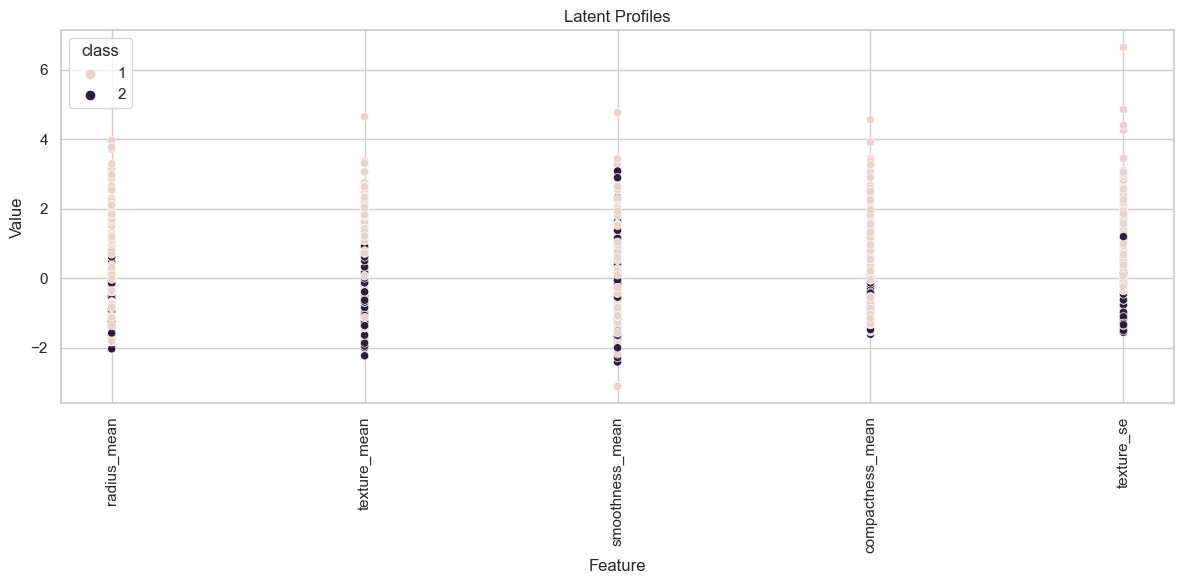

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format for easier plotting
data_melted = data.melt(id_vars='class', var_name='Feature', value_name='Value')

# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Feature', y='Value', hue='class', data=data_melted, marker='o')
plt.xticks(rotation=90)
plt.title('Latent Profiles')
plt.tight_layout()
plt.show()

/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


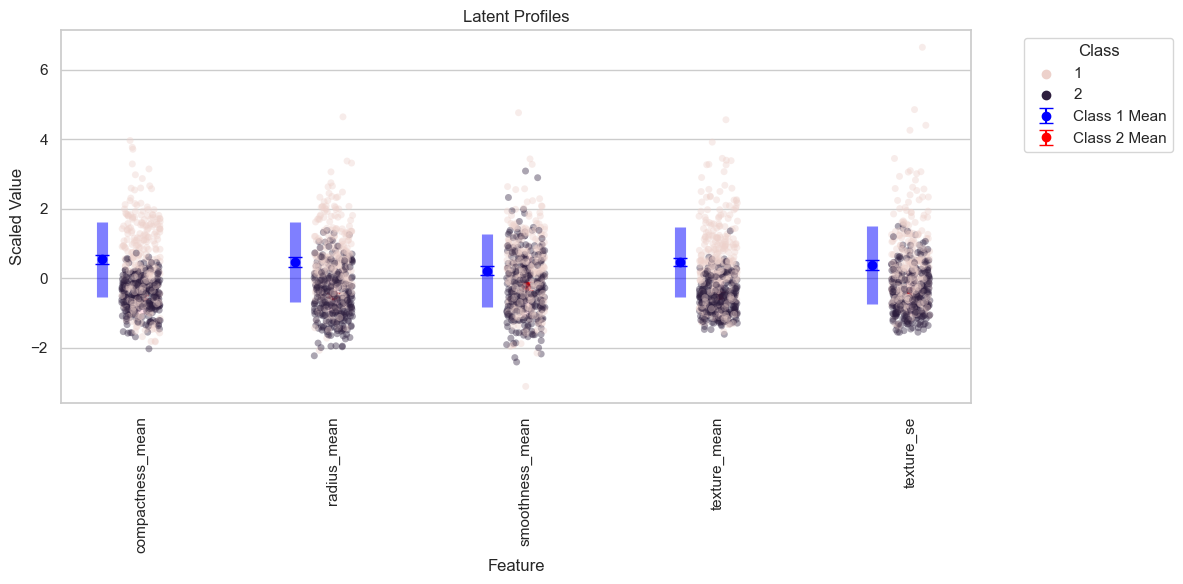

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='class', var_name='Feature', value_name='Value')

# Compute group statistics
group_stats = data_melted.groupby(['class', 'Feature']).agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute standard error and confidence intervals
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])
group_stats['ci'] = z * group_stats['sem']

# Initialize the plot
plt.figure(figsize=(12, 6))

# Plot raw data points with transparency
sns.stripplot(
    data=data_melted,
    x='Feature',
    y='Value',
    hue='class',
    dodge=False,
    alpha=0.4,
    jitter=True
)

# Plot mean points with confidence intervals and standard deviations
for idx, cls in enumerate(sorted(group_stats['class'].unique())):
    cls_stats = group_stats[group_stats['class'] == cls]
    # Adjust positions for each class
    positions = np.arange(len(cls_stats['Feature'].unique())) + (idx - len(group_stats['class'].unique()) / 2) * 0.2
    plt.errorbar(
        positions,
        cls_stats['mean'],
        yerr=cls_stats['ci'],
        fmt='o',
        label=f'Class {cls} Mean',
        capsize=5,
        color='blue' if idx == 0 else 'red'
    )
    # Add boxes representing ±1 standard deviation
    plt.vlines(
        positions,
        cls_stats['mean'] - cls_stats['std'],
        cls_stats['mean'] + cls_stats['std'],
        color='blue' if idx == 0 else 'pink',
        alpha=0.5,
        linewidth=8
    )

# Customize the plot
plt.xticks(
    ticks=np.arange(len(group_stats['Feature'].unique())),
    labels=group_stats['Feature'].unique(),
    rotation=90
)
plt.xlabel('Feature')
plt.ylabel('Scaled Value')
plt.title('Latent Profiles')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


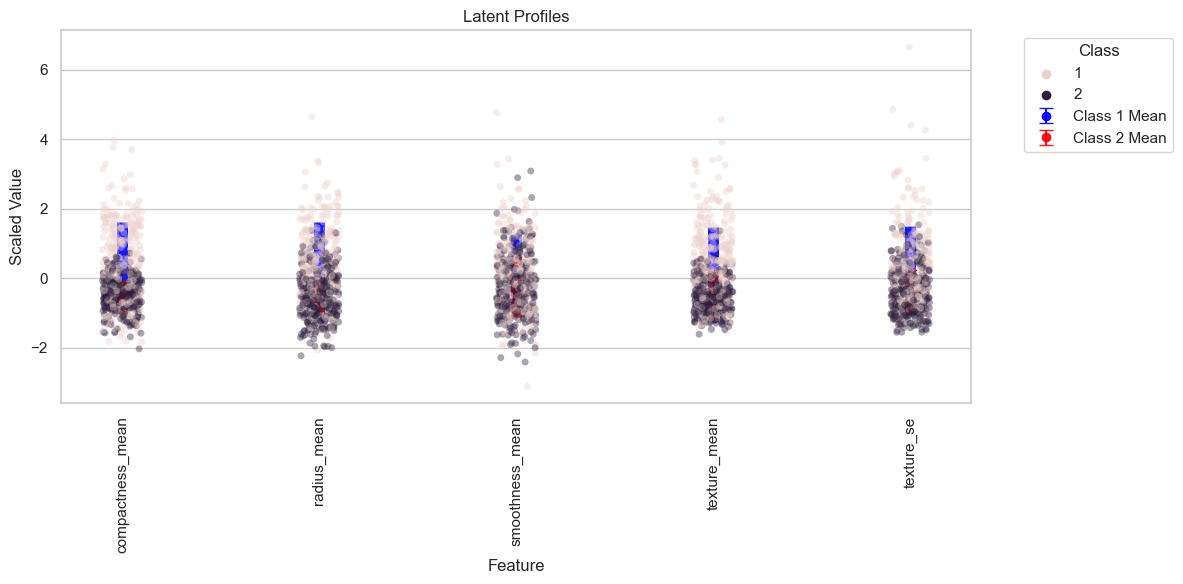

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='class', var_name='Feature', value_name='Value')

# Compute group statistics
group_stats = data_melted.groupby(['class', 'Feature']).agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute standard error and confidence intervals
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])
group_stats['ci'] = z * group_stats['sem']

# Initialize the plot
plt.figure(figsize=(12, 6))

# Plot raw data points with transparency
sns.stripplot(
    data=data_melted,
    x='Feature',
    y='Value',
    hue='class',
    dodge=False,  # Raw data not dodged
    alpha=0.4,
    jitter=True
)

# Slightly adjust positions to avoid complete overlap
num_classes = len(group_stats['class'].unique())
offset = np.linspace(-0.1, 0.1, num_classes)  # Adjust as needed for minimal offset

# Define colors for classes
class_colors = ['blue', 'red']  # Add more colors if you have more classes

# Plot mean points with confidence intervals and standard deviations
for idx, cls in enumerate(sorted(group_stats['class'].unique())):
    cls_stats = group_stats[group_stats['class'] == cls]
    # Positions aligned with raw data, slight offset to prevent overlap
    positions = np.arange(len(cls_stats['Feature'].unique()))# + offset[idx]
    plt.errorbar(
        positions,
        cls_stats['mean'],
        yerr=cls_stats['ci'],
        fmt='o',
        label=f'Class {cls} Mean',
        capsize=5,
        color=class_colors[idx],
        alpha=0.9
    )
    # Add boxes representing ±1 standard deviation
    plt.vlines(
        positions,
        cls_stats['mean'] - cls_stats['std'],
        cls_stats['mean'] + cls_stats['std'],
        color=class_colors[idx],
        alpha=0.9,
        linewidth=8
    )

# Customize the plot
plt.xticks(
    ticks=np.arange(len(group_stats['Feature'].unique())),
    labels=group_stats['Feature'].unique(),
    rotation=90
)
plt.xlabel('Feature')
plt.ylabel('Scaled Value')
plt.title('Latent Profiles')

# Adjust legend to avoid duplicate entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 1200x600 with 0 Axes>

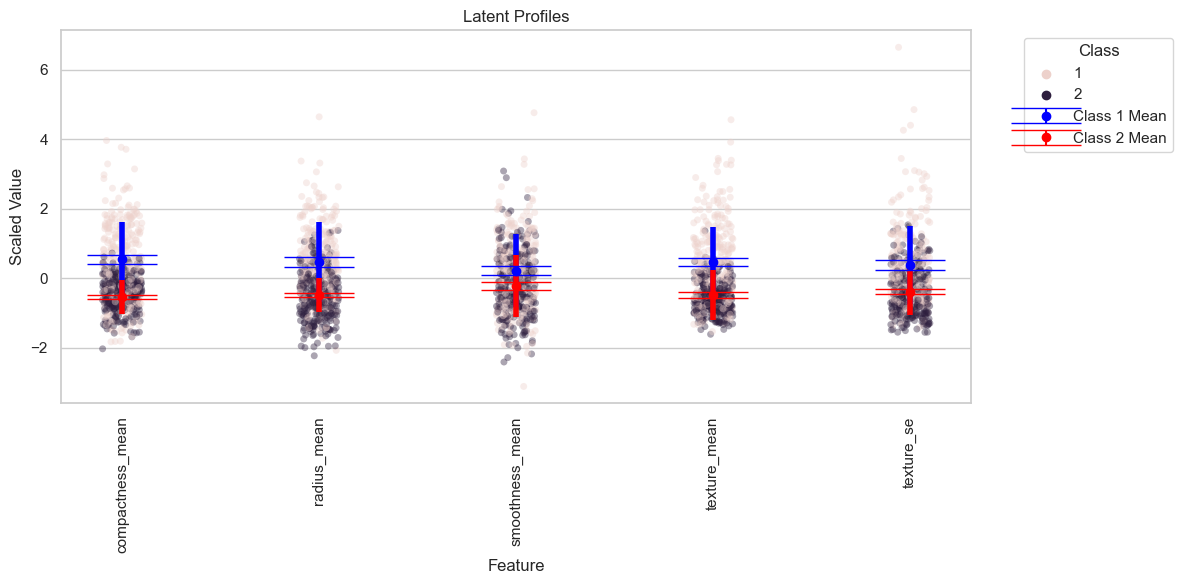

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.patches as patches

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='class', var_name='Feature', value_name='Value')

# Compute group statistics
group_stats = data_melted.groupby(['class', 'Feature']).agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute standard error and confidence intervals
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])
group_stats['ci'] = z * group_stats['sem']

# Initialize the plot
plt.figure(figsize=(12, 6))

# Initialize the plot and get the Axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot raw data points with transparency and lower zorder
sns.stripplot(
    data=data_melted,
    x='Feature',
    y='Value',
    hue='class',
    dodge=False,
    alpha=0.4,
    jitter=True,
    zorder=1,
    ax=ax  # Use the same Axes object
)

# Plot mean points and standard deviations on the same Axes
for idx, cls in enumerate(sorted(group_stats['class'].unique())):
    cls_stats = group_stats[group_stats['class'] == cls]
    positions = np.arange(len(cls_stats['Feature'].unique()))
    # Standard deviation boxes
    # ax.vlines(
    #     positions,
    #     cls_stats['mean'] - cls_stats['std'],
    #     cls_stats['mean'] + cls_stats['std'],
    #     color=class_colors[idx],
    #     alpha=1.0,
    #     linewidth=4,
    #     zorder=2
    # )
    # Create a rectangle (box) for each class instead of vertical lines
    for i, position in enumerate(positions):
        rect = patches.Rectangle(
            (position - 0.1, cls_stats['mean'][idx] - cls_stats['std'][idx]),  # Bottom-left corner
            0.2,  # Width of the box
            2 * cls_stats['std'][idx],  # Height of the box (from mean-std to mean+std)
            color=class_colors[idx],
            alpha=0.5,  # Transparency of the box
            linewidth=1,
            edgecolor='black',
            zorder=2
        )
    ax.add_patch(rect)    
    # Mean points with confidence intervals
    ax.errorbar(
        positions,
        cls_stats['mean'],
        yerr=cls_stats['ci'],
        fmt='o',
        label=f'Class {cls} Mean',
        capsize=25,
        color=class_colors[idx],
        alpha=1.0,
        zorder=3
    )

# Customize the plot using the Axes object
ax.set_xticks(np.arange(len(group_stats['Feature'].unique())))
ax.set_xticklabels(group_stats['Feature'].unique(), rotation=90)
ax.set_xlabel('Feature')
ax.set_ylabel('Scaled Value')
ax.set_title('Latent Profiles')

# Adjust legend to avoid duplicate entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(
    by_label.values(),
    by_label.keys(),
    title='Class',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()



/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_37064/1555283929.py:55: UserWarning: Setting the 'color' property will override the edgecolor or facecolor proper

<Figure size 1200x600 with 0 Axes>

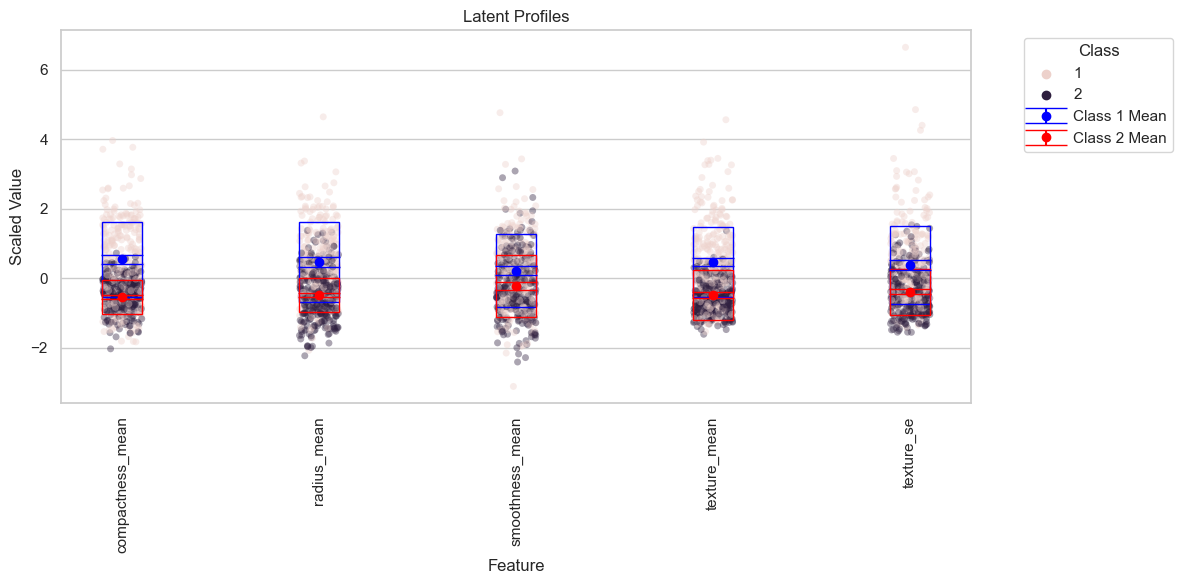

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.patches as patches

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='class', var_name='Feature', value_name='Value')

# Compute group statistics
group_stats = data_melted.groupby(['class', 'Feature']).agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute standard error and confidence intervals
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])
group_stats['ci'] = z * group_stats['sem']

# Initialize the plot
plt.figure(figsize=(12, 6))

# Initialize the plot and get the Axes object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot raw data points with transparency and lower zorder
sns.stripplot(
    data=data_melted,
    x='Feature',
    y='Value',
    hue='class',
    dodge=False,
    alpha=0.4,
    jitter=True,
    zorder=1,
    ax=ax  # Use the same Axes object
)

# Plot mean points and standard deviations on the same Axes
for idx, cls in enumerate(sorted(group_stats['class'].unique())):
    cls_stats = group_stats[group_stats['class'] == cls]
    positions = np.arange(len(cls_stats['Feature'].unique()))

    # Standard deviation boxes
    for i, position in enumerate(positions):
        rect = patches.Rectangle(
            (position - 0.1, cls_stats['mean'].iloc[i] - cls_stats['std'].iloc[i]),  # Bottom-left corner
            0.2,  # Width of the box
            2 * cls_stats['std'].iloc[i],  # Height of the box (from mean-std to mean+std)
            fc='none',  # Make the rectangle hollow
            color=class_colors[idx],
            alpha=1.0,  # Transparency of the box
            linewidth=1,
            edgecolor='black',
            zorder=2
        )
        ax.add_patch(rect)
    
    # Mean points with confidence intervals
    ax.errorbar(
        positions,
        cls_stats['mean'],
        yerr=cls_stats['ci'],
        fmt='o',
        label=f'Class {cls} Mean',
        capsize=15,
        color=class_colors[idx],
        alpha=1.0,
        zorder=3
    )



# Customize the plot using the Axes object
ax.set_xticks(np.arange(len(group_stats['Feature'].unique())))
ax.set_xticklabels(group_stats['Feature'].unique(), rotation=90)
ax.set_xlabel('Feature')
ax.set_ylabel('Scaled Value')
ax.set_title('Latent Profiles')

# Adjust legend to avoid duplicate entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(
    by_label.values(),
    by_label.keys(),
    title='Class',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_37064/1576764292.py:67: UserWarning: Setting the 'color' property will override the edgecolor or facecolor proper

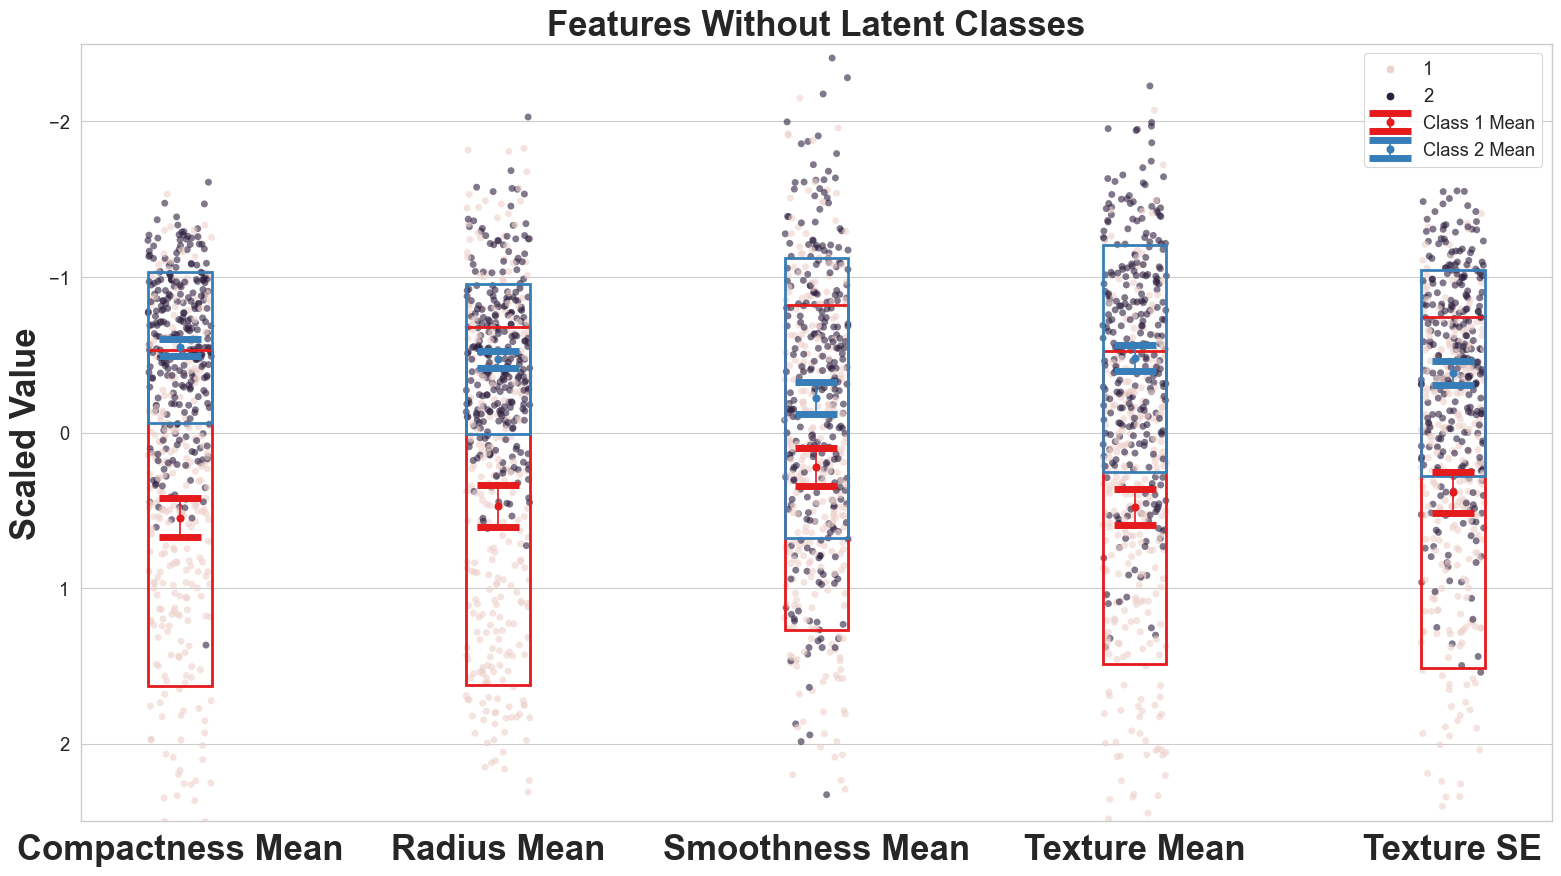

In [96]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format
data_melted = data.melt(id_vars='class', var_name='Feature', value_name='Value')

# Compute group statistics
group_stats = data_melted.groupby(['class', 'Feature']).agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute standard error and confidence intervals
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])
group_stats['ci'] = z * group_stats['sem']

# Apply publication styling
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)

# Initialize the plot and get the Axes object
fig, ax = plt.subplots(figsize=(16, 9))

# Define class colors
classes = sorted(group_stats['class'].unique())
class_colors = sns.color_palette("Set1", n_colors=len(classes))

# Define feature positions
features = sorted(group_stats['Feature'].unique())
feature_positions = {feature: i for i, feature in enumerate(features)}

# Plot raw data points with transparency and lower zorder
sns.stripplot(
    data=data_melted,
    x='Feature',
    y='Value',
    hue='class',
    dodge=False,
    alpha=0.6,
    jitter=True,
    zorder=1,
    ax=ax,  # Use the same Axes object
    #palette=class_colors,
    order=features
)

# Plot mean points and standard deviations on the same Axes
for idx, cls in enumerate(classes):
    cls_stats = group_stats[group_stats['class'] == cls]
    # Get positions for the features
    positions = [feature_positions[feature] for feature in cls_stats['Feature']]
    
    # Standard deviation boxes
    for i, position in enumerate(positions):
        rect = patches.Rectangle(
            (position - 0.1, cls_stats['mean'].iloc[i] - cls_stats['std'].iloc[i]),  # Bottom-left corner
            0.2,  # Width of the box
            2 * cls_stats['std'].iloc[i],  # Height of the box
            fc='none',  # Make the rectangle hollow
            color=class_colors[idx],
            alpha=1.0,
            linewidth=2,
            edgecolor='black',
            zorder=2
        )
        ax.add_patch(rect)
    
    # Mean points with confidence intervals
    ax.errorbar(
        positions,
        cls_stats['mean'],
        yerr=cls_stats['ci'],
        fmt='o',
        label=f'Class {cls} Mean',
        capthick=5,
        capsize=15,
        color=class_colors[idx],
        alpha=1.0,
        zorder=3
    )

# Customize the plot using the Axes object
xtick_positions = np.arange(len(features))
xtick_labels_upper = ["Compactness Mean", "Radius Mean", "Smoothness Mean", "Texture Mean", "Texture SE"] # [label.upper() for label in features]
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels_upper, rotation=0)

# Set font properties for x-tick labels
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(25)  # Larger font size

# Set y-axis limits
ax.set_ylim(2.5, -2.5)
ax.set_xlabel('Feature', fontsize=16, fontweight='bold')
ax.set_ylabel('Scaled Value', fontsize=16, fontweight='bold')
ax.set_title('Features with Latent Profiles Classes', fontsize=18, fontweight='bold')

# Adjust legend to avoid duplicate entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(
    by_label.values(),
    by_label.keys(),
    title='Class',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
# Remove the legend since there's only one class
ax.legend().set_visible(True)
ax.set_xlabel('') 
ax.set_xlabel('Feature', fontsize=25, fontweight='bold')
#ax.axes.get_xaxis().set_visible(False)
ax.set_xlabel('') 
ax.set_ylabel('Scaled Value', fontsize=25, fontweight='bold')
ax.set_title('Features Without Latent Classes', fontsize=25, fontweight='bold')

plt.tight_layout()
# Save the figure with 300 dpi
plt.savefig('latent_profiles_final.png', dpi=300)
plt.show()

/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


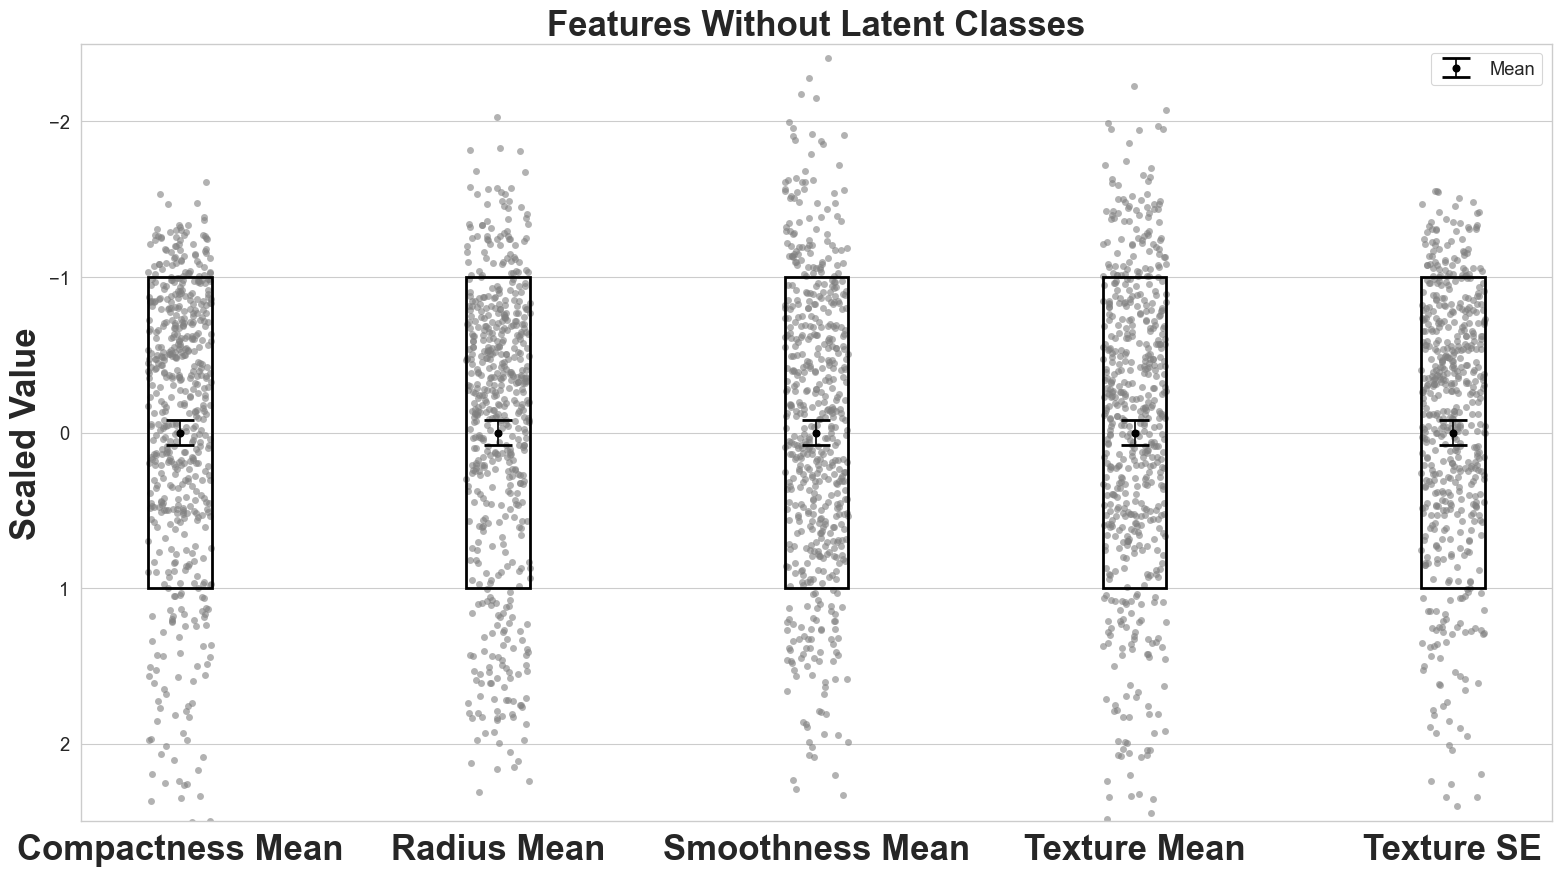

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from scipy import stats

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Optionally, set 'class' to a constant value (e.g., 'All') or drop it
data = data.drop(columns='class')

# Melt the DataFrame to long format
data_melted = data.melt(var_name='Feature', value_name='Value')

# Compute group statistics
group_stats = data_melted.groupby('Feature').agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute standard error and confidence intervals
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])
group_stats['ci'] = z * group_stats['sem']

# Apply publication styling
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)

# Initialize the plot and get the Axes object
fig, ax = plt.subplots(figsize=(16, 9))

# Define feature positions
features = sorted(group_stats['Feature'].unique())
feature_positions = {feature: i for i, feature in enumerate(features)}

# Plot raw data points with transparency and lower zorder
sns.stripplot(
    data=data_melted,
    x='Feature',
    y='Value',
    dodge=False,
    alpha=0.6,
    jitter=True,
    zorder=1,
    ax=ax,
    order=features,
    color='gray'  # Set a single color for all data points
)

# Get positions for the features
positions = [feature_positions[feature] for feature in group_stats['Feature']]

# Standard deviation boxes
for i, position in enumerate(positions):
    rect = patches.Rectangle(
        (position - 0.1, group_stats['mean'].iloc[i] - group_stats['std'].iloc[i]),
        0.2,
        2 * group_stats['std'].iloc[i],
        fc='none',
        edgecolor='black',
        linewidth=2,
        zorder=2
    )
    ax.add_patch(rect)

# Mean points with confidence intervals
ax.errorbar(
    positions,
    group_stats['mean'],
    yerr=group_stats['ci'],
    fmt='o',
    label='Mean',
    capthick=2,
    capsize=10,
    color='black',
    alpha=1.0,
    zorder=3
)

# Customize the plot using the Axes object
xtick_positions = np.arange(len(features))
xtick_labels_upper = ["Compactness Mean", "Radius Mean", "Smoothness Mean", "Texture Mean", "Texture SE"]
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels_upper, rotation=0)

# Set font properties for x-tick labels
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(25)  # Larger font size

# Set y-axis limits
ax.set_ylim(2.5, -2.5)
ax.legend(
    by_label.values(),
    by_label.keys(),
    title='Class',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
ax.set_xlabel('Feature', fontsize=25, fontweight='bold')
#ax.axes.get_xaxis().set_visible(False)
ax.set_xlabel('') 
ax.set_ylabel('Scaled Value', fontsize=25, fontweight='bold')
ax.set_title('Features Without Latent Classes', fontsize=25, fontweight='bold')

# Remove the legend since there's only one class
ax.legend().set_visible(True)

plt.tight_layout()
# Save the figure with 300 dpi
plt.savefig('features_single_class_final.png', dpi=300)
plt.show()

/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_37064/4257222286.py:79: UserWarning: Setting the 'color' property will override the edgecolor or facecolor proper

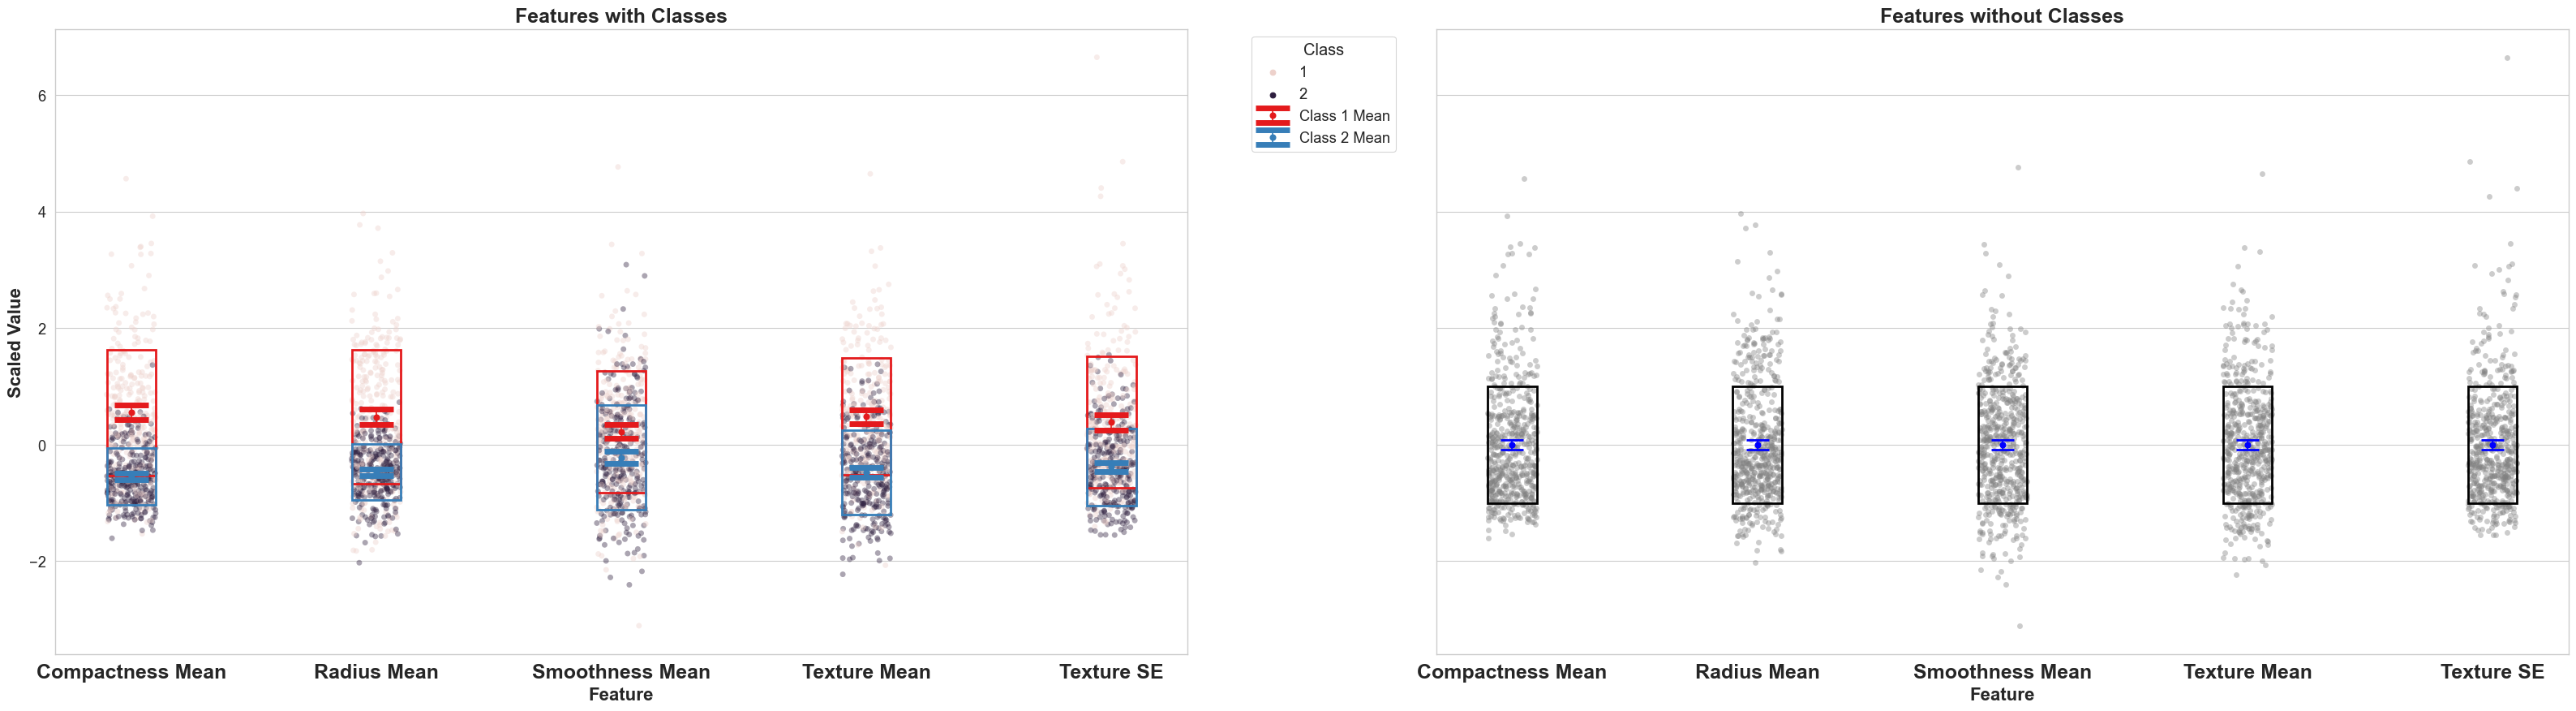

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from scipy import stats

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format for both plots
data_melted_class = data.melt(id_vars='class', var_name='Feature', value_name='Value')
data_melted_single = data.drop(columns='class').melt(var_name='Feature', value_name='Value')

# Compute group statistics for the plot with classes
group_stats_class = data_melted_class.groupby(['class', 'Feature']).agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute group statistics for the plot without classes
group_stats_single = data_melted_single.groupby('Feature').agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute standard error and confidence intervals for both
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

# For classes
group_stats_class['sem'] = group_stats_class['std'] / np.sqrt(group_stats_class['count'])
group_stats_class['ci'] = z * group_stats_class['sem']

# For single class
group_stats_single['sem'] = group_stats_single['std'] / np.sqrt(group_stats_single['count'])
group_stats_single['ci'] = z * group_stats_single['sem']

# Apply publication styling
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)

# Initialize the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 9), sharey=True)

### Plot 1: With Classes ###
# Define class colors
classes = sorted(group_stats_class['class'].unique())
class_colors = sns.color_palette("Set1", n_colors=len(classes))

# Define feature positions
features = sorted(group_stats_class['Feature'].unique())
feature_positions = {feature: i for i, feature in enumerate(features)}

# Plot raw data points with transparency and lower zorder
sns.stripplot(
    data=data_melted_class,
    x='Feature',
    y='Value',
    hue='class',
    dodge=False,
    alpha=0.4,
    jitter=True,
    zorder=1,
    ax=ax1,
    order=features
)

# Plot mean points and standard deviations
for idx, cls in enumerate(classes):
    cls_stats = group_stats_class[group_stats_class['class'] == cls]
    positions = [feature_positions[feature] for feature in cls_stats['Feature']]
    
    # Standard deviation boxes
    for i, position in enumerate(positions):
        rect = patches.Rectangle(
            (position - 0.1, cls_stats['mean'].iloc[i] - cls_stats['std'].iloc[i]),
            0.2,
            2 * cls_stats['std'].iloc[i],
            fc='none',
            color=class_colors[idx],
            linewidth=2,
            edgecolor='black',
            zorder=2
        )
        ax1.add_patch(rect)
    
    # Mean points with confidence intervals
    ax1.errorbar(
        positions,
        cls_stats['mean'],
        yerr=cls_stats['ci'],
        fmt='o',
        label=f'Class {cls} Mean',
        capthick=5,
        capsize=15,
        color=class_colors[idx],
        alpha=1.0,
        zorder=3
    )

# Customize the first plot
xtick_positions = np.arange(len(features))
xtick_labels_upper = ["Compactness Mean", "Radius Mean", "Smoothness Mean", "Texture Mean", "Texture SE"]
ax1.set_xticks(xtick_positions)
ax1.set_xticklabels(xtick_labels_upper, rotation=0)

# Set font properties for x-tick labels
for tick in ax1.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(18)

ax1.set_xlabel('Feature', fontsize=16, fontweight='bold')
ax1.set_ylabel('Scaled Value', fontsize=16, fontweight='bold')
ax1.set_title('Features with Classes', fontsize=18, fontweight='bold')

# Adjust legend
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(
    by_label.values(),
    by_label.keys(),
    title='Class',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

### Plot 2: Without Classes ###
# Define feature positions
features_single = sorted(group_stats_single['Feature'].unique())
feature_positions_single = {feature: i for i, feature in enumerate(features_single)}

# Plot raw data points
sns.stripplot(
    data=data_melted_single,
    x='Feature',
    y='Value',
    dodge=False,
    alpha=0.4,
    jitter=True,
    zorder=1,
    ax=ax2,
    order=features_single,
    color='gray'
)

# Get positions for the features
positions_single = [feature_positions_single[feature] for feature in group_stats_single['Feature']]

# Standard deviation boxes
for i, position in enumerate(positions_single):
    rect = patches.Rectangle(
        (position - 0.1, group_stats_single['mean'].iloc[i] - group_stats_single['std'].iloc[i]),
        0.2,
        2 * group_stats_single['std'].iloc[i],
        fc='none',
        edgecolor='black',
        linewidth=2,
        zorder=2
    )
    ax2.add_patch(rect)

# Mean points with confidence intervals
ax2.errorbar(
    positions_single,
    group_stats_single['mean'],
    yerr=group_stats_single['ci'],
    fmt='o',
    label='Mean',
    capthick=2,
    capsize=10,
    color='blue',
    alpha=1.0,
    zorder=3
)

# Customize the second plot
ax2.set_xticks(xtick_positions)
ax2.set_xticklabels(xtick_labels_upper, rotation=0)

# Set font properties for x-tick labels
for tick in ax2.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(18)

ax2.set_xlabel('Feature', fontsize=16, fontweight='bold')
ax2.set_title('Features without Classes', fontsize=18, fontweight='bold')

# Remove the legend for the second plot
ax2.legend().set_visible(False)

# Adjust layout
plt.tight_layout()
# Save the figure with 300 dpi
plt.savefig('features_side_by_side.png', dpi=300)
plt.show()

/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kslote/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_37064/4244073746.py:79: UserWarning: Setting the 'color' property will override the edgecolor or facecolor proper

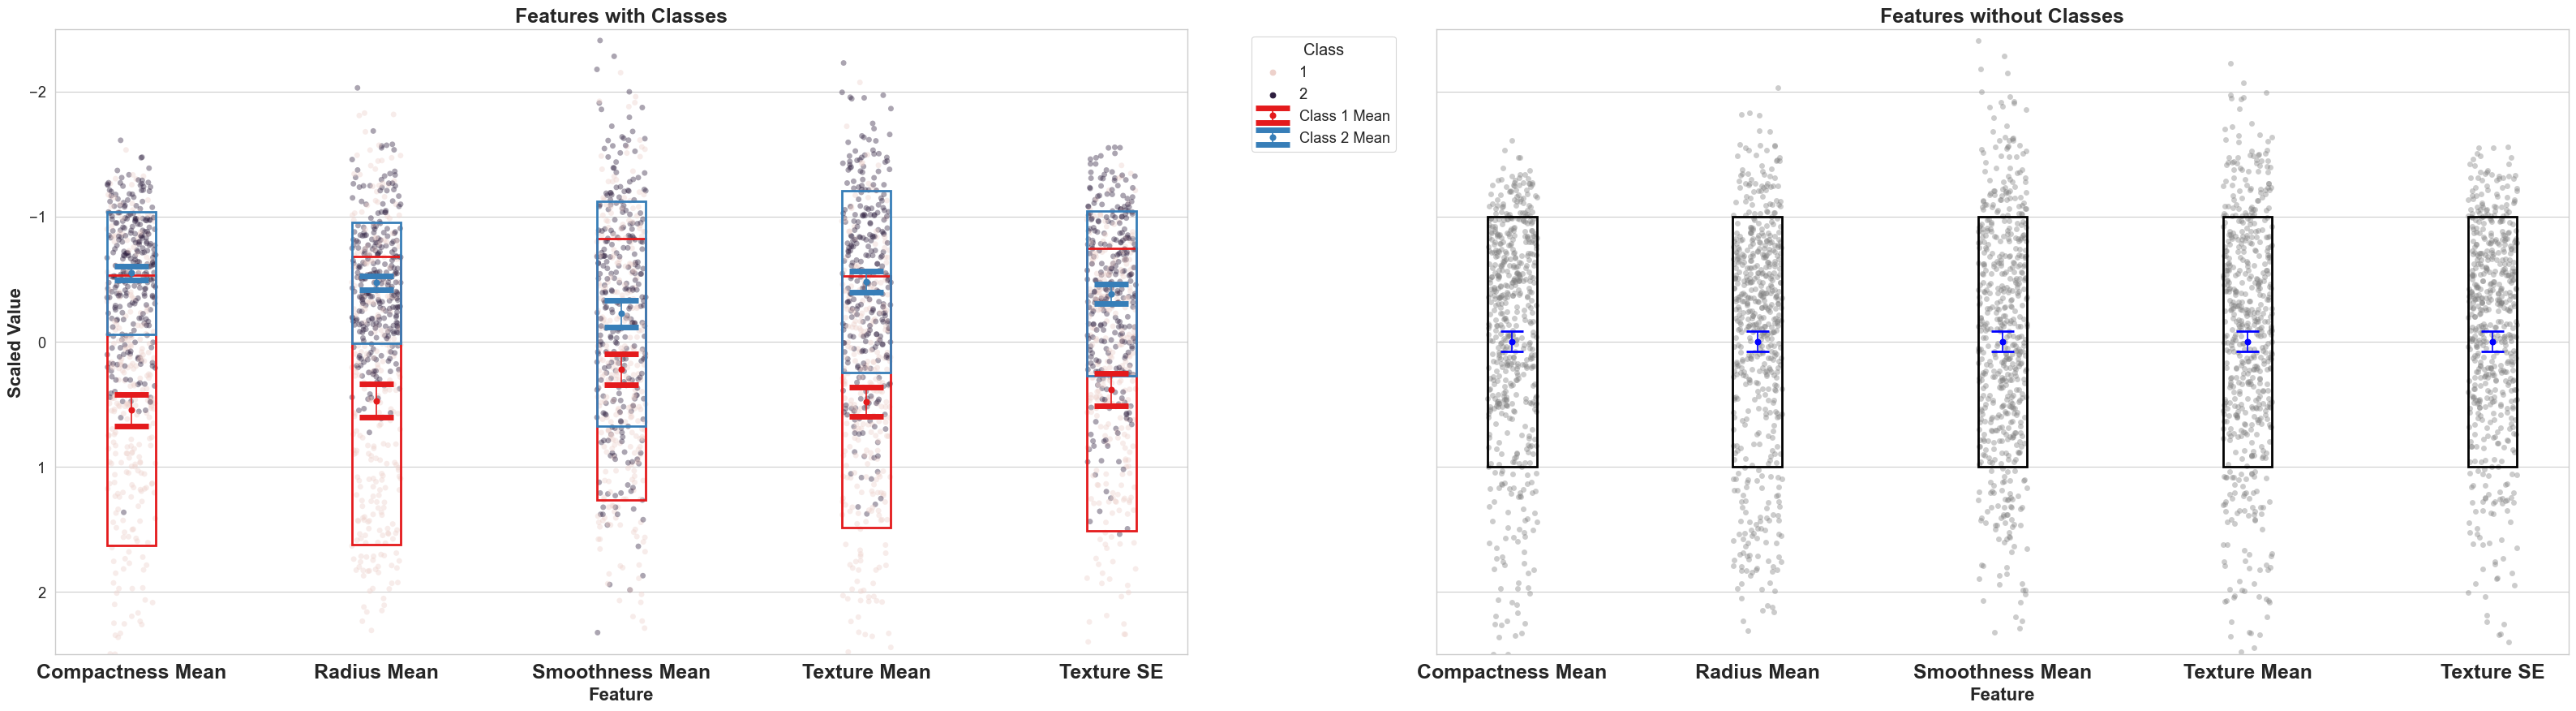

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from scipy import stats

# Load the data
data = pd.read_csv('data_with_labels.csv')

# Melt the DataFrame to long format for both plots
data_melted_class = data.melt(id_vars='class', var_name='Feature', value_name='Value')
data_melted_single = data.drop(columns='class').melt(var_name='Feature', value_name='Value')

# Compute group statistics for the plot with classes
group_stats_class = data_melted_class.groupby(['class', 'Feature']).agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute group statistics for the plot without classes
group_stats_single = data_melted_single.groupby('Feature').agg(
    mean=('Value', 'mean'),
    std=('Value', 'std'),
    count=('Value', 'count')
).reset_index()

# Compute standard error and confidence intervals for both
confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1 - alpha / 2)

# For classes
group_stats_class['sem'] = group_stats_class['std'] / np.sqrt(group_stats_class['count'])
group_stats_class['ci'] = z * group_stats_class['sem']

# For single class
group_stats_single['sem'] = group_stats_single['std'] / np.sqrt(group_stats_single['count'])
group_stats_single['ci'] = z * group_stats_single['sem']

# Apply publication styling
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)

# Initialize the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 9), sharey=True)

### Plot 1: With Classes ###
# Define class colors
classes = sorted(group_stats_class['class'].unique())
class_colors = sns.color_palette("Set1", n_colors=len(classes))

# Define feature positions
features = sorted(group_stats_class['Feature'].unique())
feature_positions = {feature: i for i, feature in enumerate(features)}

# Plot raw data points with transparency and lower zorder
sns.stripplot(
    data=data_melted_class,
    x='Feature',
    y='Value',
    hue='class',
    dodge=False,
    alpha=0.4,
    jitter=True,
    zorder=1,
    ax=ax1,
    order=features
)

# Plot mean points and standard deviations
for idx, cls in enumerate(classes):
    cls_stats = group_stats_class[group_stats_class['class'] == cls]
    positions = [feature_positions[feature] for feature in cls_stats['Feature']]
    
    # Standard deviation boxes
    for i, position in enumerate(positions):
        rect = patches.Rectangle(
            (position - 0.1, cls_stats['mean'].iloc[i] - cls_stats['std'].iloc[i]),
            0.2,
            2 * cls_stats['std'].iloc[i],
            fc='none',
            color=class_colors[idx],
            linewidth=2,
            edgecolor='black',
            zorder=2
        )
        ax1.add_patch(rect)
    
    # Mean points with confidence intervals
    ax1.errorbar(
        positions,
        cls_stats['mean'],
        yerr=cls_stats['ci'],
        fmt='o',
        label=f'Class {cls} Mean',
        capthick=5,
        capsize=15,
        color=class_colors[idx],
        alpha=1.0,
        zorder=3
    )

# Set y-axis limits
ax1.set_ylim(4, -2.5)

# Customize the first plot
xtick_positions = np.arange(len(features))
xtick_labels_upper = ["Compactness Mean", "Radius Mean", "Smoothness Mean", "Texture Mean", "Texture SE"]
ax1.set_xticks(xtick_positions)
ax1.set_xticklabels(xtick_labels_upper, rotation=0)

# Set font properties for x-tick labels
for tick in ax1.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(18)

ax1.set_xlabel('Feature', fontsize=16, fontweight='bold')
ax1.set_ylabel('Scaled Value', fontsize=16, fontweight='bold')
ax1.set_title('Features with Classes', fontsize=18, fontweight='bold')

# Adjust legend
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(
    by_label.values(),
    by_label.keys(),
    title='Class',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

### Plot 2: Without Classes ###
# Define feature positions
features_single = sorted(group_stats_single['Feature'].unique())
feature_positions_single = {feature: i for i, feature in enumerate(features_single)}

# Plot raw data points
sns.stripplot(
    data=data_melted_single,
    x='Feature',
    y='Value',
    dodge=False,
    alpha=0.4,
    jitter=True,
    zorder=1,
    ax=ax2,
    order=features_single,
    color='gray'
)

# Get positions for the features
positions_single = [feature_positions_single[feature] for feature in group_stats_single['Feature']]

# Standard deviation boxes
for i, position in enumerate(positions_single):
    rect = patches.Rectangle(
        (position - 0.1, group_stats_single['mean'].iloc[i] - group_stats_single['std'].iloc[i]),
        0.2,
        2 * group_stats_single['std'].iloc[i],
        fc='none',
        edgecolor='black',
        linewidth=2,
        zorder=2
    )
    ax2.add_patch(rect)

# Mean points with confidence intervals
ax2.errorbar(
    positions_single,
    group_stats_single['mean'],
    yerr=group_stats_single['ci'],
    fmt='o',
    label='Mean',
    capthick=2,
    capsize=10,
    color='blue',
    alpha=1.0,
    zorder=3
)

# Set y-axis limits
ax2.set_ylim(2.5, -2.5)

# Customize the second plot
ax2.set_xticks(xtick_positions)
ax2.set_xticklabels(xtick_labels_upper, rotation=0)

# Set font properties for x-tick labels
for tick in ax2.get_xticklabels():
    tick.set_fontweight('bold')
    tick.set_fontsize(18)

ax2.set_xlabel('Feature', fontsize=16, fontweight='bold')
ax2.set_title('Features without Classes', fontsize=18, fontweight='bold')

# Remove the legend for the second plot
ax2.legend().set_visible(False)

# Adjust layout
plt.tight_layout()
# Save the figure with 300 dpi
plt.savefig('features_side_by_side.png', dpi=300)
plt.show()